# Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms

This project tries to reproduce and enhance results from the paper Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms by Victor Chang, Jozenne Bailey, Qianwen Ariel Xu and Zhili Sun. The main purpose of the paper is diagnosing diabetes mellitus from the data obtained by an e-diagnosis system using machine learning algorithms. However, only algorithms that can be interpreted have been employed and used. 

## 1. Data preparation and visualization

### Import all necessary dependencies

In [124]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, anderson
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

### Load the dataset

In [34]:
diabetes = pd.read_csv("data/diabetes.csv")

### Start the initial data exploration

In [35]:
# We have 768 data points with 8 independent and 1 dependent variable
diabetes.shape

(768, 9)

In [36]:
# Take a look what are we dealing with
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
# Get info about non-null values and data types.
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see that there are no categorical variables, the dataset contains only **combination of discrete (BMI and DiabetesPedigreeFunction) and continuous variables (the rest)**.
This makes our life a little bit easier because we don't have to think about **categorical variables** and conversion to the numerical values using e.g **label encoding or one hot encoding**.
Also great thing is that the dataset contains all data, there are **no null or missing values**.

### Descriptive statistics

In [38]:
# First glance at some basic statistical info
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


More or less, from the columns values it can be easily concluded **what which feature represents** but let's make it clear so we remove any possible confusion:
- **Pregnancies** -> The number of pregnancies.
- **Glucose** -> Plasma glucose concentration at 2 hours in an oral glucose tolerance test (GTIT).
- **BloodPressure** -> Diastolic Blood Pressure (mm Hg).
- **SkinThickness** -> Triceps skin fold thickness (mm).
- **Insulin** -> 2-Hour Serum insulin (uh/ml).
- **BMI** -> Body mass index (weight in kg/height in m).
- **DiabetesPedigreeFunction** -> A function that scores the likelihood of diabetes based on family history.
- **Age** -> Age (years).
- **Outcome** -> Binary value indicating non-diabetic/diabetic.


In [39]:
# Check if there are some candidates for monotonic attributes
diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

It seems that there are **no monotonic attributes**. If we think more about values and what they represent, this makes perfect sense. 
Before diving deeper into visualizing data, let's make sure that all data we have are correct and have some meaning. From the domain experts, it is known that for neither of the features zero values should be present in the dataset and hence, if such exist, can be considered inconsistent. However, from the output of the `describe()` method we see that zero values exist for the **glucose concentration, blood pressure, insulin, BMI and skin fold thickness data**. Let's take a look at how many such examples we are dealing with.

In [40]:
print("Blood pressure is invalid in:", (diabetes.BloodPressure == 0).sum(), "examples. ")
print("Glucose concentration is invalid in:", (diabetes.Glucose == 0).sum(), "examples. ")
print("Insulin is invalid in:", (diabetes.Insulin == 0).sum(), "examples. ")
print("BMI is invalid in:", (diabetes.BMI == 0).sum(), "examples. ")
print("Skin fold thickness is invalid in:", (diabetes.SkinThickness == 0).sum(), "examples. ")

print("----------")
print("In", ((diabetes.BloodPressure == 0) | (diabetes.Glucose == 0) | (diabetes.Insulin == 0) | (diabetes.BMI == 0) | (diabetes.SkinThickness == 0)).sum(), "examples, there is at least one feature invalid. " )

Blood pressure is invalid in: 35 examples. 
Glucose concentration is invalid in: 5 examples. 
Insulin is invalid in: 374 examples. 
BMI is invalid in: 11 examples. 
Skin fold thickness is invalid in: 227 examples. 
----------
In 376 examples, there is at least one feature invalid. 


This means that 0.4896% of examples contain some feature invalid which is quite a lot. Because of that, we will **impute the median value on the features that had invalid zero values**. Let's just mention that there are other valid approaches like **imputing the mean and dominant value, removing invalid examples or copying existing values with random noise added**.

### Impute the median value

In [41]:
# Change all zero values with the median values
diabetes_med = diabetes.copy()
diabetes_med.loc[diabetes.BloodPressure == 0, "BloodPressure"] = diabetes.loc[:, "BloodPressure"].median()
diabetes_med.loc[diabetes.Glucose == 0, "Glucose"] = diabetes.loc[:, "Glucose"].median()
diabetes_med.loc[diabetes.Insulin == 0, "Insulin"] = diabetes.loc[:, "Insulin"].median()
diabetes_med.loc[diabetes.BMI == 0, "BMI"] = diabetes.loc[:, "BMI"].median()
diabetes_med.loc[diabetes.SkinThickness == 0, "SkinThickness"] = diabetes.loc[:, "SkinThickness"].median()

Since with this procedure **insulin and skin fold thickness values** are being disrupted, we want to make sure that **the distribution of those features** remained the same.

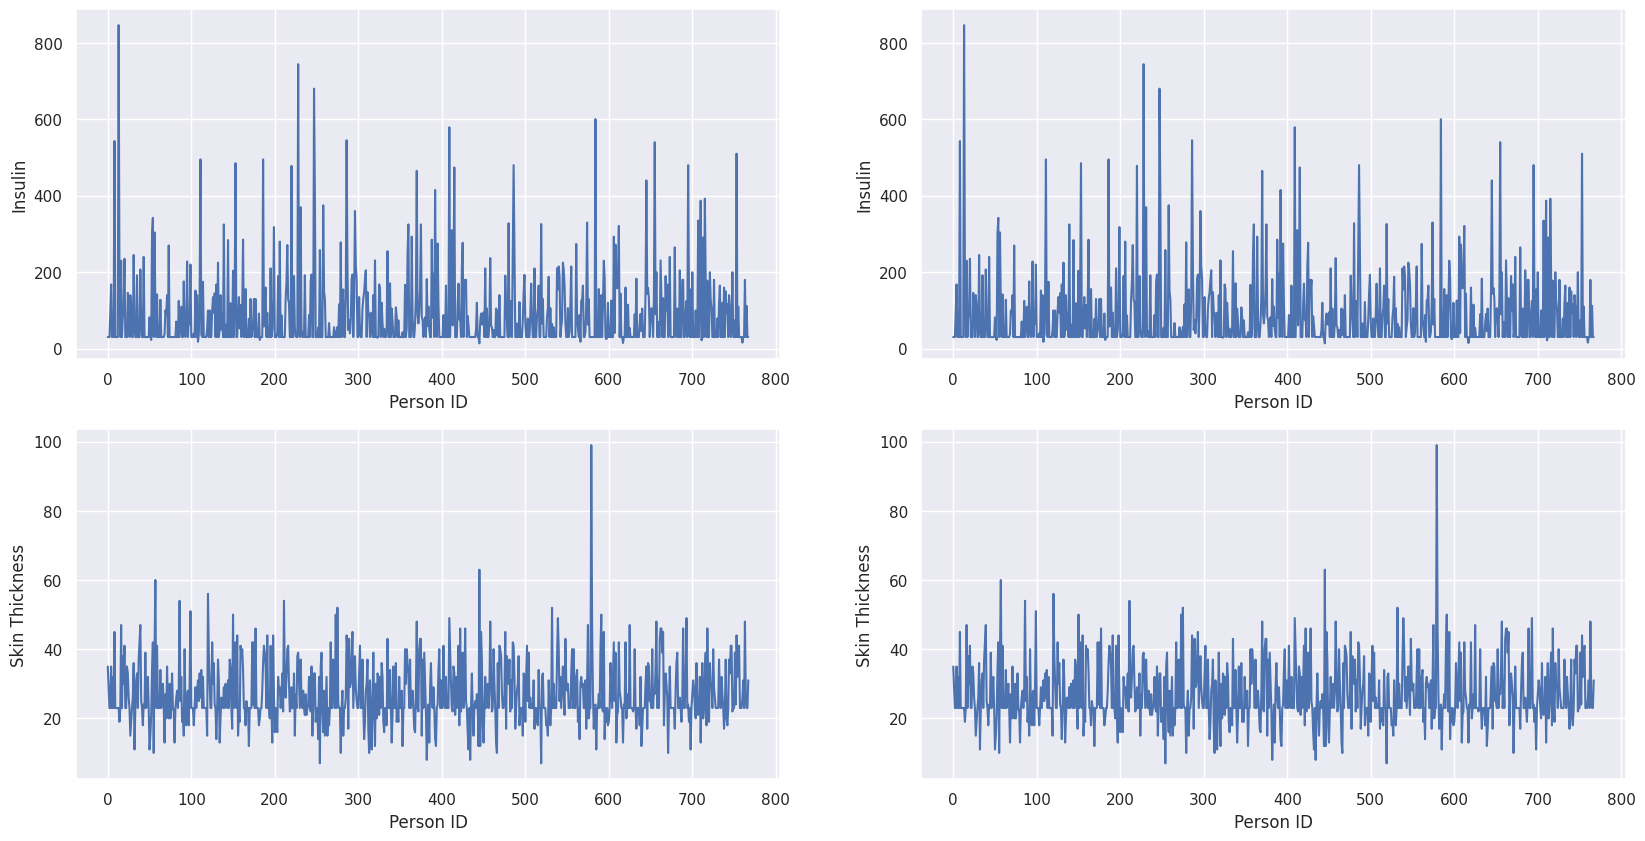

In [112]:
# First extract all values that we will use
ids = [i for i in range(768)]
blood_pressures = diabetes.BloodPressure

# define axes
fig, ax = plt.subplots(2,2, figsize=(20,10)) 

# Insulin distributions comparison
ax[0, 0].plot(ids, diabetes.Insulin)
ax[0, 0].set_xlabel("Person ID")
ax[0, 0].set_ylabel("Insulin")
ax[0, 1].plot(ids, diabetes_med.Insulin)
ax[0, 1].set_xlabel("Person ID")
ax[0, 1].set_ylabel("Insulin")

# Skin thickness distributions comparison
ax[1, 0].plot(ids, diabetes.SkinThickness)
ax[1, 0].set_xlabel("Person ID")
ax[1, 0].set_ylabel("Skin Thickness")
ax[1, 1].plot(ids, diabetes_med.SkinThickness)
ax[1, 1].set_xlabel("Person ID")
ax[1, 1].set_ylabel("Skin Thickness")

plt.show()

Since it is very hard to estimate if the distributions are the same, let's test that out with the two-sample **Kolmogorov-Smirnov test**. Our **null hypothesis** is that the distributions of the original values and with the imputed median values **are the same** for insulin and skin thickness features. 

In [113]:
print(ks_2samp(diabetes.Insulin, diabetes_med.Insulin))
print(ks_2samp(diabetes.SkinThickness, diabetes_med.SkinThickness))

KstestResult(statistic=0.0, pvalue=1.0)
KstestResult(statistic=0.0, pvalue=1.0)


Since the **p-value is very small**, we have sufficient evidence that two distributions for insulin and skin thickness values are not the same so we **reject the null hypothesis**. Although this is not the ideal scenario, we **continue our survey with the same data** since we cannot afford to lose almost 50% of the data we have.

In [114]:
diabetes = diabetes_med

### Outliers

In this part, we will try to deal with **outliers**. They may exist due to the **variability in the measurements or experimental errors**. One of the best methods to detect outliers is by plotting distribution with the help of the **box-plot**. We will skip age and pregnancies since those value may have their "inner bias" so concluding there are some outliers would be more guessing than finding some meaningful insights.

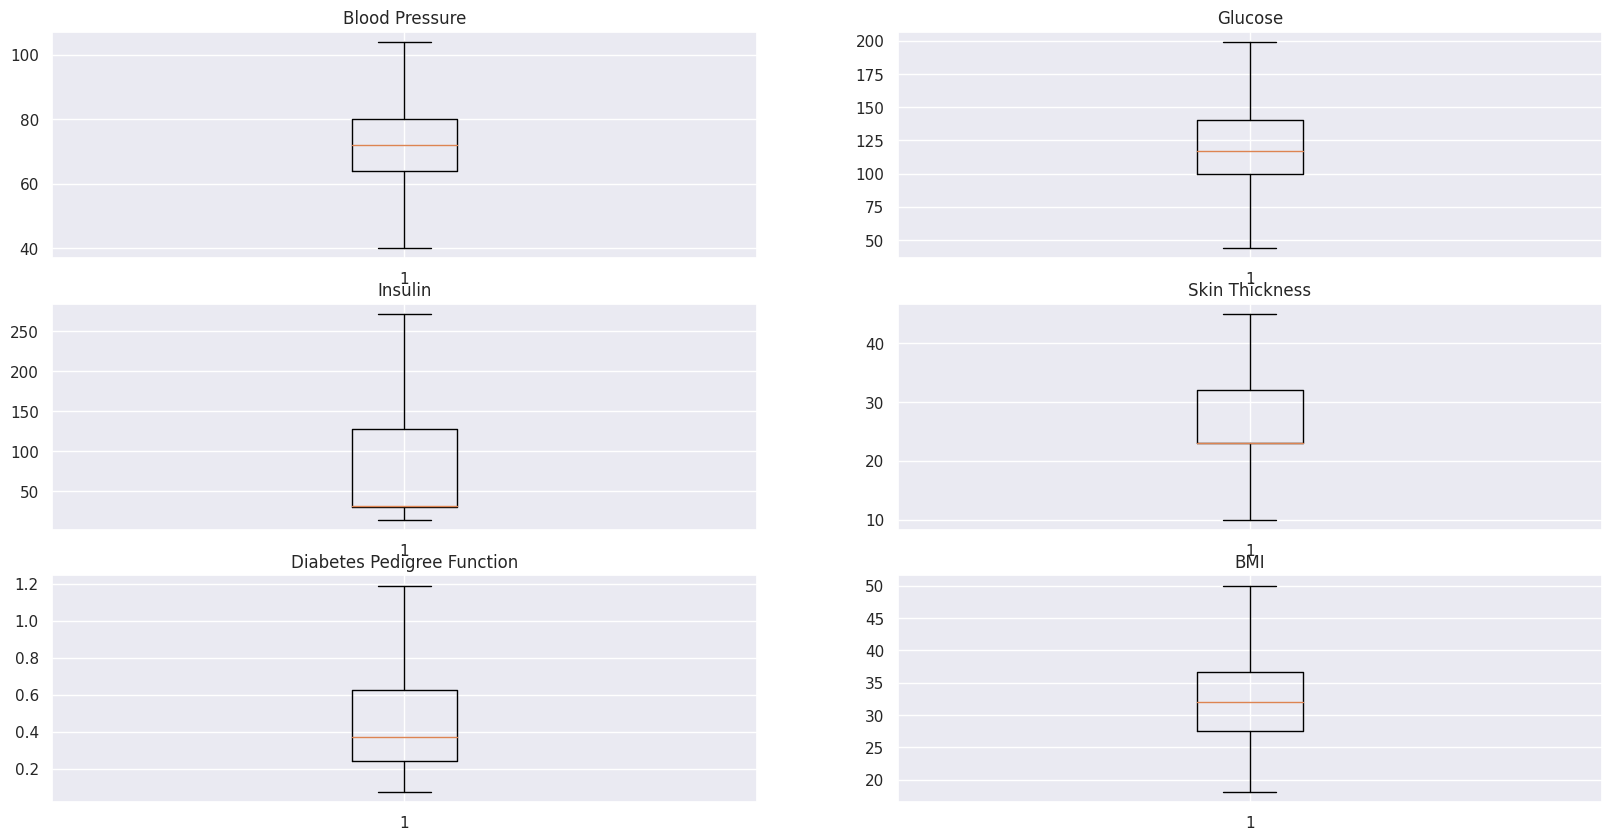

In [128]:
# define the axes
fix, ax = plt.subplots(3, 2, figsize=(20, 10))
# Blood pressure
ax[0, 0].boxplot(diabetes.BloodPressure, showfliers=False)
ax[0, 0].set_title("Blood Pressure")
# Glucose
ax[0, 1].boxplot(diabetes.Glucose, showfliers=False)
ax[0, 1].set_title("Glucose")
# Insulin
ax[1, 0].boxplot(diabetes.Insulin, showfliers=False)
ax[1, 0].set_title("Insulin")
# SkinThickness
ax[1, 1].boxplot(diabetes.SkinThickness, showfliers=False)
ax[1, 1].set_title("Skin Thickness")
# Diabetes pedigree function
ax[2, 0].boxplot(diabetes.DiabetesPedigreeFunction, showfliers=False)
ax[2, 0].set_title("Diabetes Pedigree Function")
# BMI
ax[2, 1].boxplot(diabetes.BMI, showfliers=False)
ax[2, 1].set_title("BMI")
plt.show()

**Box plots** may indicate that outliers exist for the insulin and diabetes pedigree function features. However, thinking about outliers for the insulin feature can be quite misleading since **the median value was imputed** in almost half of the examples so it is logical that the whole distribution is quite centred. Another visualization that can give us insight if there are some outliers is the histogram.




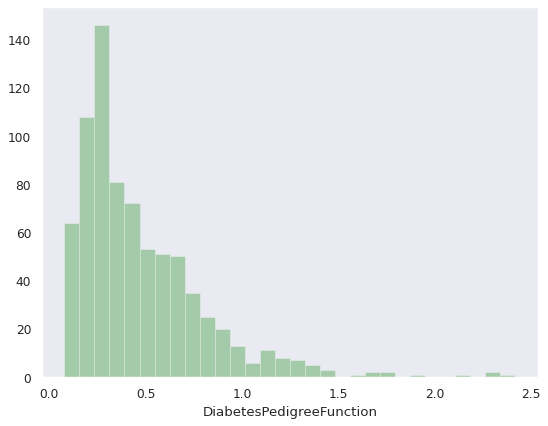

In [129]:
# Use the histogram to detect the outliers in the diabetes pedigree function
figure(figsize=(8, 6), dpi=80)
plt.hist(diabetes.DiabetesPedigreeFunction, bins=30, alpha=0.3, color="green")
plt.grid()
plt.xlabel("DiabetesPedigreeFunction")
plt.show()

Since there are some very small bins far to the right, **it is possible that they represent outliers**. **Standardization of the data and the calculation of the z-scores** can also be used for detecting outliers. We use an assumption that the data comes from the **normal distribution and calculate the probability of seeing such or more extreme value**. Along **goodness-of-fit tests, the QQ plot may be a good indicator of the data normality**. 

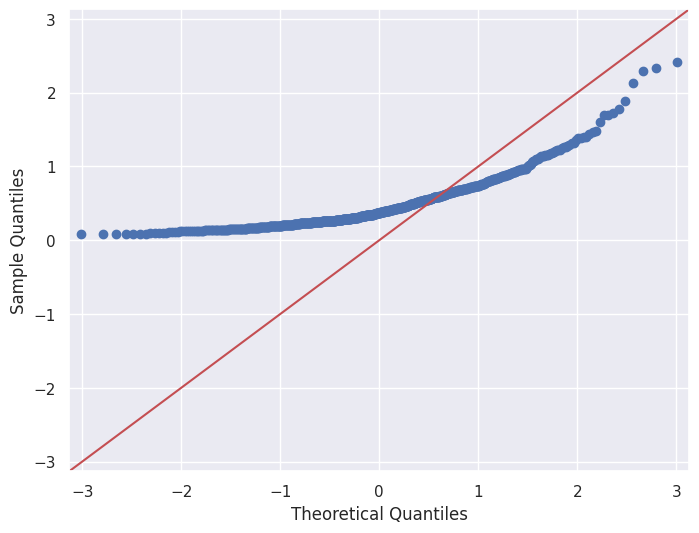

In [130]:
fig = sm.qqplot(diabetes.DiabetesPedigreeFunction, line='45')
fig.set_size_inches(8, 6)
plt.show()

QQ plot indicates that the data doesn't come from the normal distribution. Let's confirm that with the `Anderson-Darling` test with **the null hypothesis that the data comes from the normal distribution**.

In [131]:
anderson(diabetes.DiabetesPedigreeFunction)

AndersonResult(statistic=29.13404800507169, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Since **the test statistics is greater than critical values at all significance levels, we reject the null hypothesis that the data comes from the normal distribution**. Unfortunately, the QQ plot and `Anderson-Darling` test gave us a lot of evidence to conclude that the values don't follow a normal distribution. **Hence, we will give up on detecting outliers with the z-scores**.

Since the author didn't take much care about outliers, we will also skip this analysis and leave it maybe for the end and possible improvements.

### Dataset imabalance

Most machine learning algorithms are very sensitive to the situations in which there is significant difference between the number of positive and the number of negative examples. Let's check what is the situation with the diabetes dataset.


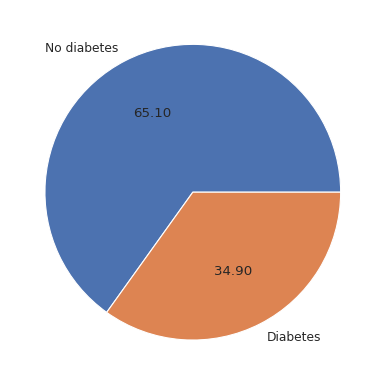

In [132]:
outcomes = diabetes.groupby("Outcome").count().loc[:, "Pregnancies"]
figure(figsize=(8, 6), dpi=80)
plt.pie(outcomes, labels=["No diabetes", "Diabetes"], autopct='%.2f')
plt.show()

Although the imbalance exists, it is not significant and the author also didn't take this into account so without further data preparation, let's explore data in some new ways!

## Feature engineering


The next thing that interests us is whether we can somehow **determine if there are some connections between features** and whether some **feature is a good predictor**. If data points of two features are **aligned this may mean that they are somehow linearly related**. Determining upfront whether some feature is a good predictor is a hard task. We will **plot the distributions of each feature conditioned on the target class** and if they differ, this may be a good indicator that the feature is a good predictor. 

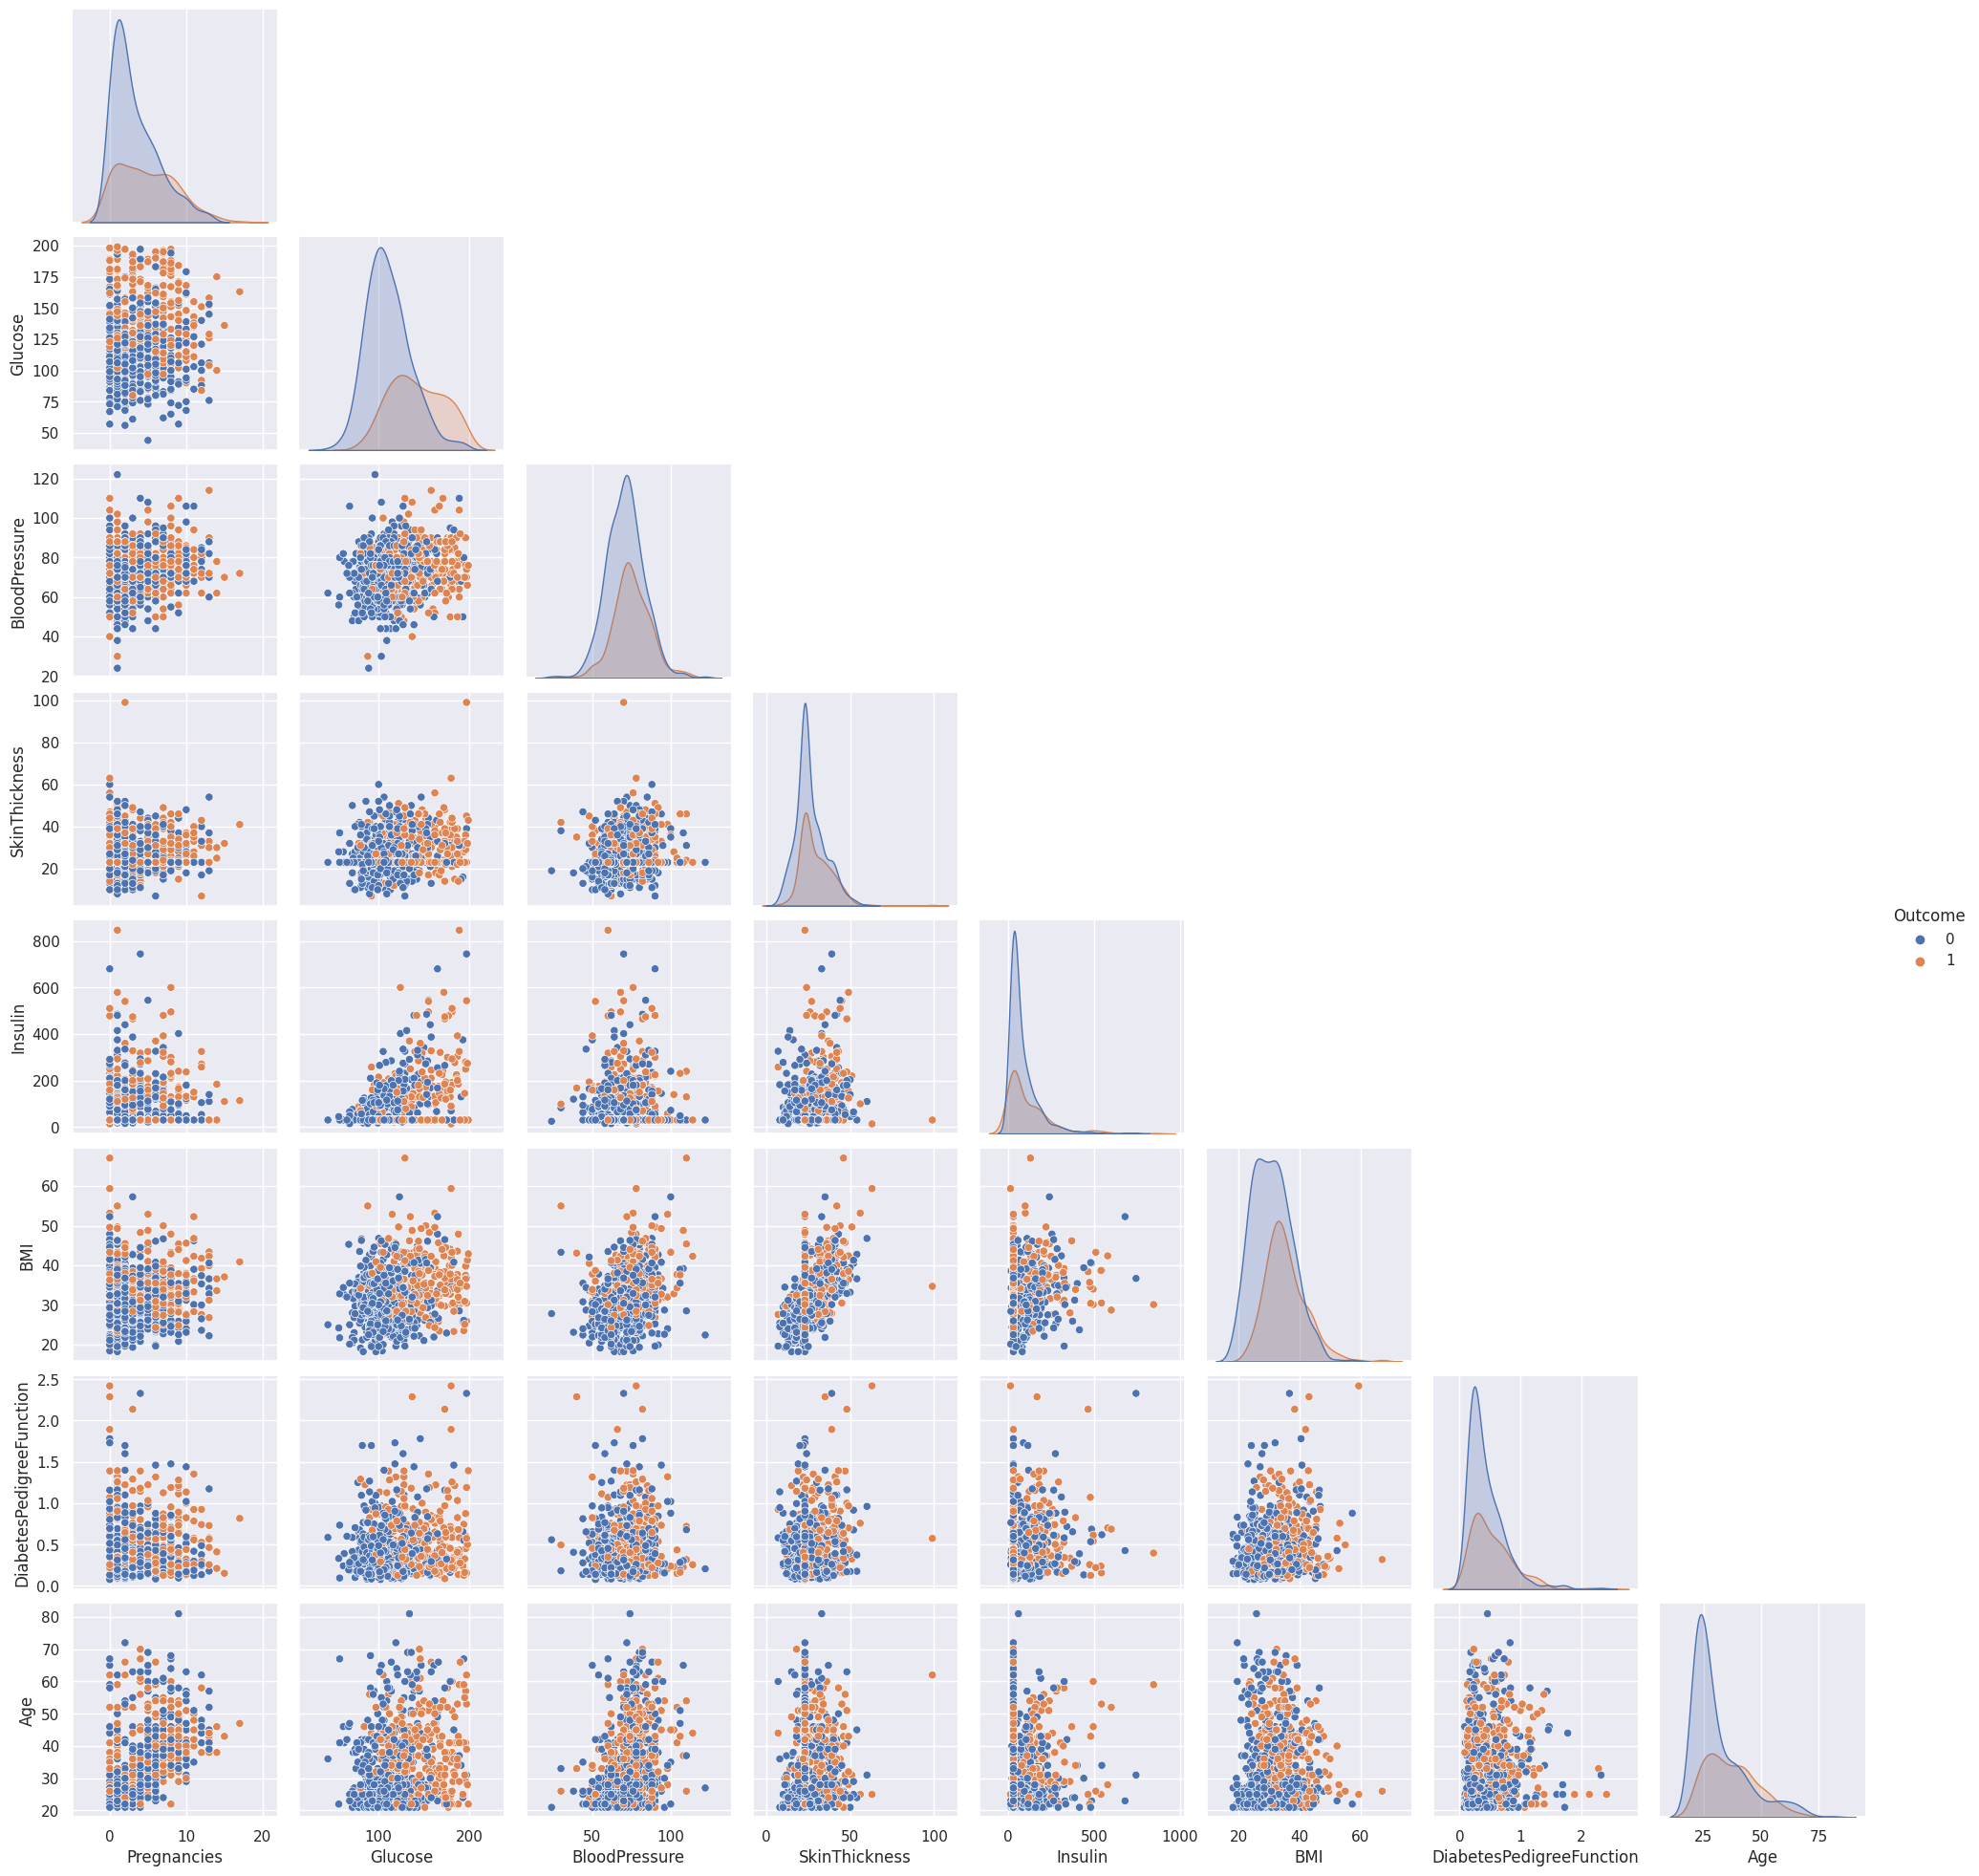

In [133]:
sns.pairplot(diabetes, hue="Outcome", corner=True)
plt.show()

From this output we can conclude that almost **all combinations of features are very scattered and hence not linearly related**. We can only maybe create a hypothesis that the age and the pregnancies are somehow related and this would mean that one of those features should be removed but knowing the context, this doesn't make any sense. **The distributions for each feature differ quite which as we mentioned, may indicate the features are good predictors**. To confirm that combinations of features are scattered let's also **plot the correlation matrix in a form of a heat map**.

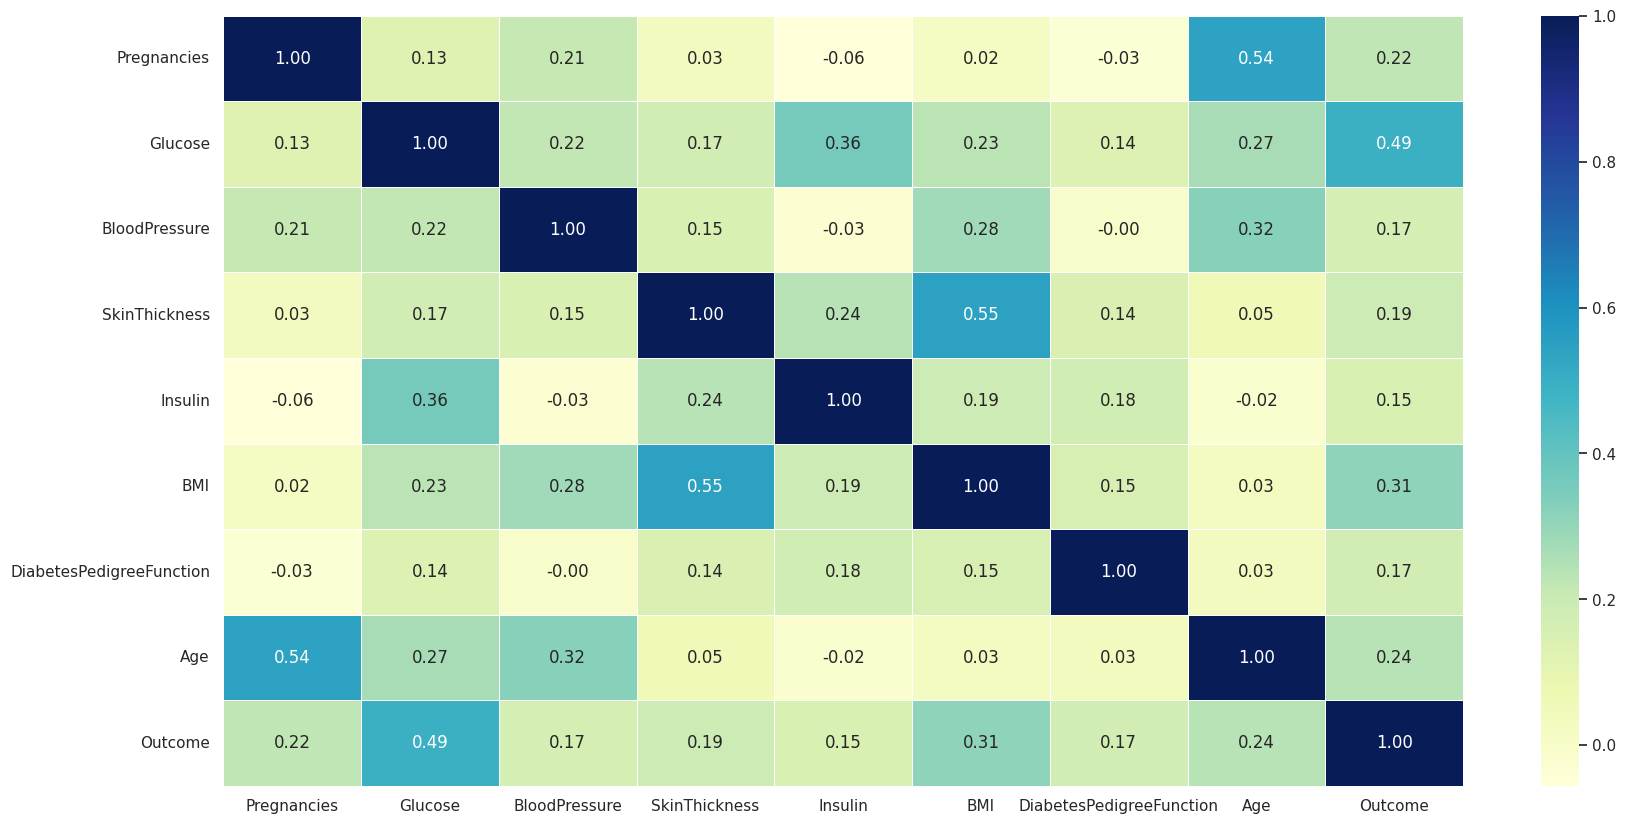

In [134]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(diabetes.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

Indeed, all correlation values are quite low which is why we will continue with all features and conclude that all features bring necessary information in the dataset. The most correlated feature with the outcome is Glucose. Let's visualize values of the Glucose using the combination of the violin and the swarm plot.

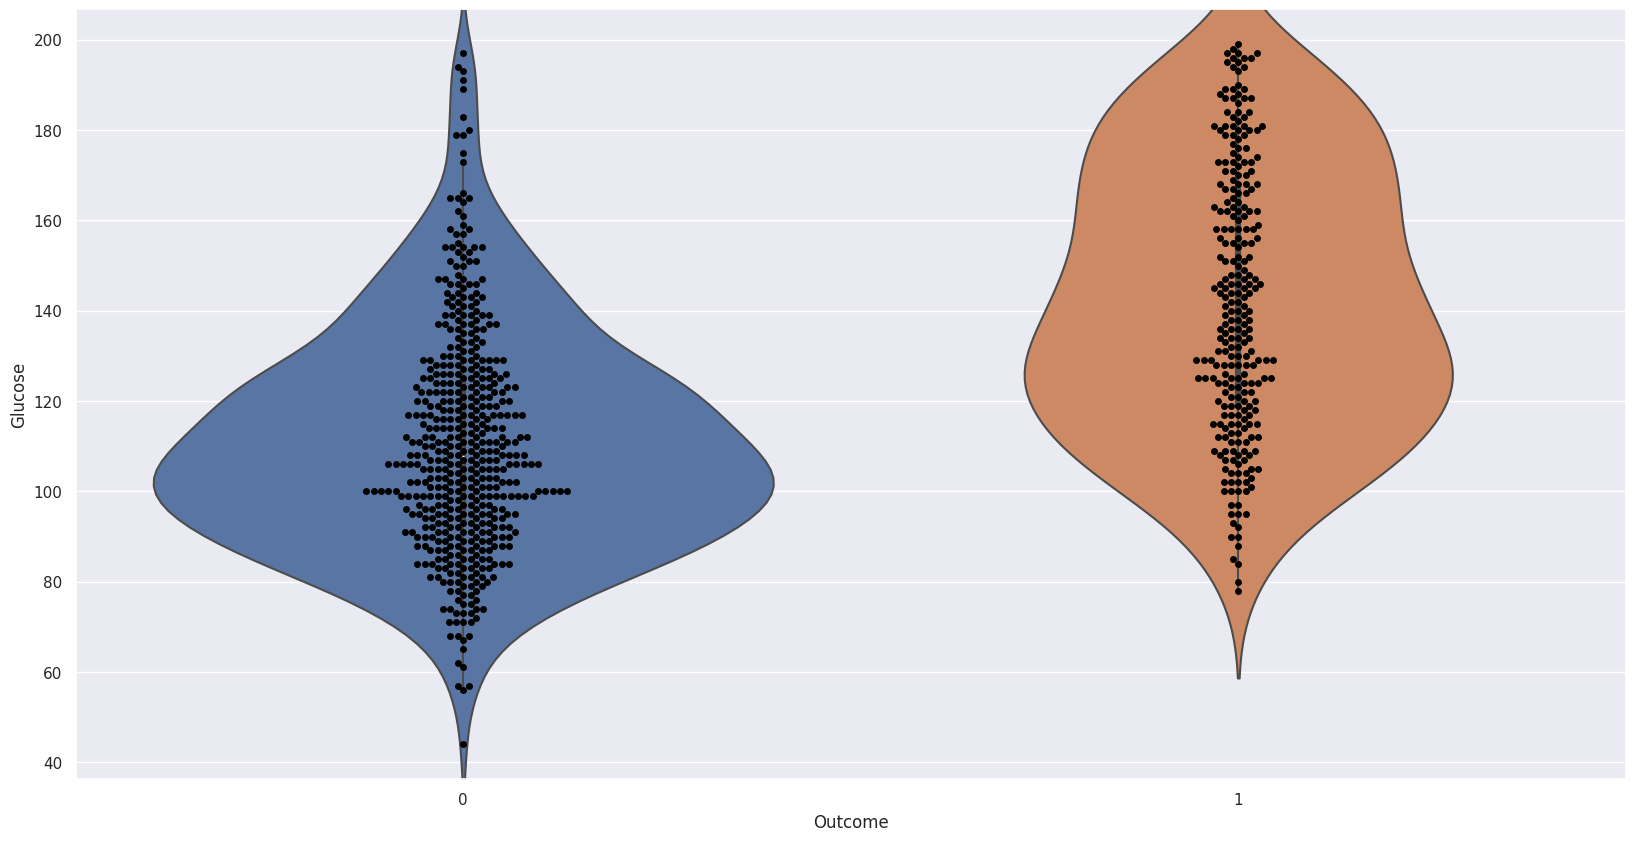

In [149]:
sns.violinplot(x="Outcome", y="Glucose", data=diabetes)
sns.swarmplot(x='Outcome', y="Glucose", data=diabetes, color='black')
plt.show()

Plot gives us an intuition that the higher glucose level may result more often in the positive diabetes outcome. This can also be read from the scatterplot and the visualization of the glucose values distribution.

## Splitting the dataset

All machine learning algorithms that are mentioned in the paper are **first trained on the training set and then their performance is checked on the test set**. Because of this, **the target class distribution must be faithfully represented in both training and test set**. The same conclusion stays if need a validation set for tuning the algorithms. The author used a **70-30 dataset split**.

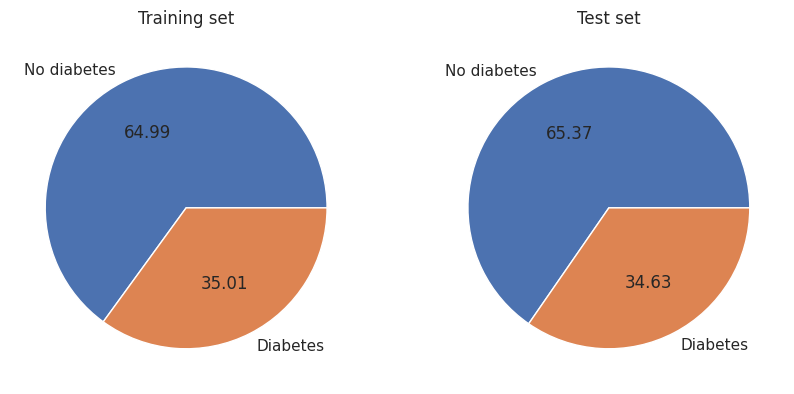

In [136]:
# split the dataset
random_state = 42
X = diabetes.loc[:, diabetes.columns != "Outcome"]
y = diabetes.loc[:, "Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Calculate the number of positive and negative examples in train and test dataset
_, counts_tr = np.unique(y_train, return_counts=True)
_, counts_test = np.unique(y_test, return_counts=True)

# define the axes and plot distributions
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fig.set_size_inches(10, 8)
ax[0].pie(counts_tr, labels=["No diabetes", "Diabetes"], autopct='%.2f')
ax[0].set_title("Training set")
ax[1].pie(counts_test, labels=["No diabetes", "Diabetes"], autopct='%.2f')
ax[1].set_title("Test set")
plt.show()

The relative frequency of positive and negative examples is the same. Let's proceed to some machine learning classification!